## Importing all the necessary libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

## Loading the hand written numbers images from the keras datasets

In [2]:
(xtrain,ytrain), (xtest,ytest) = keras.datasets.mnist.load_data()

In [3]:
xtest.shape

(10000, 28, 28)

[5 0 4 ... 5 6 8]


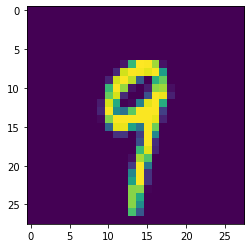

In [4]:
print(ytrain)
import matplotlib.pyplot as plt
plt.imshow(xtrain[600])

## Bringing the pixel values between the range of 0 to 1

In [5]:
xtrain = xtrain/255
xtest = xtest/255

In [6]:
xtrain[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Creating the neural network model and adding some hidden layers 

## Used softmax because we are solving multi class classification problem

In [7]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


## Compiling and fitting the model

In [18]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [19]:
history = model.fit(xtrain,ytrain, epochs = 25, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0097 - accuracy: 0.9971 - val_loss: 0.1808 - val_accuracy: 0.9752
Epoch 2/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0066 - accuracy: 0.9980 - val_loss: 0.1999 - val_accuracy: 0.9720
Epoch 3/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0084 - accuracy: 0.9972 - val_loss: 0.1855 - val_accuracy: 0.9756
Epoch 4/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0083 - accuracy: 0.9974 - val_loss: 0.1862 - val_accuracy: 0.9742
Epoch 5/25
1500/1500 [==============================] - 1s 997us/step - loss: 0.0052 - accuracy: 0.9985 - val_loss: 0.1683 - val_accuracy: 0.9757
Epoch 6/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0070 - accuracy: 0.9978 - val_loss: 0.1792 - val_accuracy: 0.9759
Epoch 7/25
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0071 - accuracy: 0.9977 - val_loss: 0.1718 - val_accurac

In [20]:
yprob = model.predict(xtest)

In [21]:
yprob

array([[6.46012986e-24, 1.30720683e-19, 2.41798193e-25, ...,
        1.00000000e+00, 2.02554237e-22, 2.81278017e-20],
       [1.38292839e-23, 7.38502298e-16, 1.00000000e+00, ...,
        3.93035579e-20, 1.82907728e-18, 4.02762466e-38],
       [1.94233443e-23, 1.00000000e+00, 2.43161825e-16, ...,
        2.49876564e-10, 1.36681599e-09, 1.67430282e-21],
       ...,
       [0.00000000e+00, 1.71831027e-27, 0.00000000e+00, ...,
        1.38782026e-18, 1.54092940e-20, 1.49743278e-21],
       [6.79432564e-38, 7.14799575e-36, 2.12520948e-33, ...,
        7.00245325e-26, 2.44654350e-15, 0.00000000e+00],
       [1.49473586e-25, 1.67503195e-35, 9.44645535e-23, ...,
        0.00000000e+00, 3.99807963e-31, 1.28490055e-33]], dtype=float32)

In [22]:
yprob[[500]]

array([[0.0000000e+00, 0.0000000e+00, 2.0887752e-34, 1.0000000e+00,
        0.0000000e+00, 1.5886984e-27, 0.0000000e+00, 0.0000000e+00,
        5.3401967e-30, 3.3297107e-21]], dtype=float32)

In [23]:
y_pred = yprob.argmax(axis = 1)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_pred)

0.9771

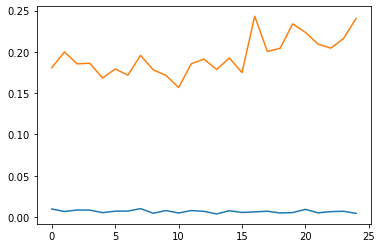

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

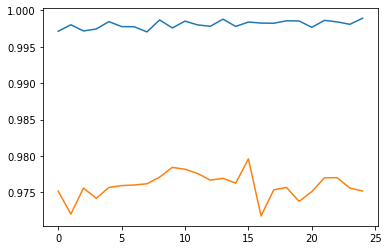

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [27]:
xtest

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

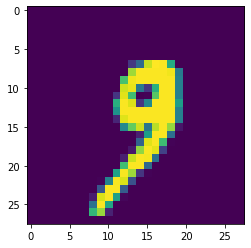

In [32]:
plt.imshow(xtest[1000])

In [31]:
model.predict(xtest[1000].reshape(1,28,28)).argmax(axis =1)

array([9], dtype=int64)